<a href="https://colab.research.google.com/github/Gopika-C/New-Project/blob/main/projectmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing required packages for this module
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report


In [ ]:
import json
jsonpath=Path('/content/drive/MyDrive/Mini Project/datasetnew.json')
with jsonpath.open('r',encoding='utf-8')as dat_f:
  dat=json.loads(dat_f.read())
  df=pd.json_normalize(dat)
  df.to_csv('/content/drive/MyDrive/Mini Project/newdataset.csv',encoding='utf-8',index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Mini Project/newdataset.csv")
data

,modload_count,process_path,alert_type,sensor_criticality,@timestamp,report_score,watchlist_id,sensor_id,feed_name,created_time,...,interface_ip,segment_id,total_hosts,feed_id,status,os_type,@version,childproc_count,unique_id,feed_rating
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4171,322,nvd,2019-11-29T12:11:06.587Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,c9845596-2a1c-40fa-ba73-1a3cb250e988,3
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4181,322,nvd,2019-11-29T12:11:06.589Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,a3e78117-f02b-4a58-9194-39b8c153b1fb,3
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4138,322,nvd,2019-11-29T12:11:06.413Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,cf8a47c0-fe5e-4738-a0c4-841c04bd4e85,3
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4128,322,nvd,2019-11-29T12:11:06.406Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,9c819b01-6e5c-4985-92a6-132c98cb6f63,3
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4227,322,nvd,2019-11-29T12:11:06.41Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7cbfe316-3569-4a6b-8b30-efd474b13cc6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-6924,322,nvd,2019-11-29T12:11:06.398Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,7511c8ec-d15e-4856-b2ea-ae52ccf51b39,3
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.856Z,40,CVE-2016-4235,322,nvd,2019-11-29T12:11:06.592Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,0de5284e-30c9-4f12-9816-e64a3271e0af,3
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.855Z,40,CVE-2016-4166,322,nvd,2019-11-29T12:11:06.595Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,f13e5381-0167-4c2e-9d3d-211480c7cd3a,3
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,watchlist.hit.ingress.process,3,2019-11-29T12:18:17.855Z,40,CVE-2016-4174,322,nvd,2019-11-29T12:11:06.62Z,...,172.20.7.254,-1.223531e+09,198,18,Unresolved,windows,1,2,884fe9a3-b70c-49f4-9299-230b73c63cf9,3


In [ ]:
ds=data[['modload_count','process_path','sensor_criticality','alert_type','@timestamp','watchlist_id','tags','report_score','alert_severity']]

In [ ]:
ds

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-6924,['carbonblack'],40,27.0
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4235,['carbonblack'],40,27.0
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4166,['carbonblack'],40,27.0
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4174,['carbonblack'],40,27.0


In [ ]:
ds.dtypes

modload_count          object
process_path           object
sensor_criticality      int64
alert_type             object
@timestamp             object
watchlist_id           object
tags                   object
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
df=ds
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4171,['carbonblack'],40,27.0
1,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4181,['carbonblack'],40,27.0
2,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4138,['carbonblack'],40,27.0
3,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4128,['carbonblack'],40,27.0
4,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4227,['carbonblack'],40,27.0
...,...,...,...,...,...,...,...,...,...
2367,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-6924,['carbonblack'],40,27.0
2368,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.856Z,CVE-2016-4235,['carbonblack'],40,27.0
2369,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4166,['carbonblack'],40,27.0
2370,2,c:\windows\syswow64\macromed\flash\flashplayer...,3,watchlist.hit.ingress.process,2019-11-29T12:18:17.855Z,CVE-2016-4174,['carbonblack'],40,27.0


In [ ]:
#applying the labelencoder for datatype convertion
from sklearn.preprocessing  import LabelEncoder

In [ ]:
label_encoder=LabelEncoder()
df['modload_count']=label_encoder.fit_transform(df['modload_count'].astype(str))
df['process_path']=label_encoder.fit_transform(df['process_path'].astype(str))
df['alert_type']=label_encoder.fit_transform(df['alert_type'].astype(str))
df['watchlist_id']=label_encoder.fit_transform(df['watchlist_id'].astype(str))
df['tags']=label_encoder.fit_transform(df['tags'].astype(str))





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0,1,3,0,12,14,0,40,27.0
1,0,1,3,0,12,16,0,40,27.0
2,0,1,3,0,12,11,0,40,27.0
3,0,1,3,0,12,10,0,40,27.0
4,0,1,3,0,12,19,0,40,27.0
...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,12,25,0,40,27.0
2368,0,1,3,0,12,20,0,40,27.0
2369,0,1,3,0,11,13,0,40,27.0
2370,0,1,3,0,11,15,0,40,27.0


In [ ]:
df.dtypes

modload_count           int64
process_path            int64
sensor_criticality      int64
alert_type              int64
@timestamp              int64
watchlist_id            int64
tags                    int64
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
pd.to_datetime(df['@timestamp'])

0      1970-01-01 00:00:00.000000012
1      1970-01-01 00:00:00.000000012
2      1970-01-01 00:00:00.000000012
3      1970-01-01 00:00:00.000000012
4      1970-01-01 00:00:00.000000012
                    ...             
2367   1970-01-01 00:00:00.000000012
2368   1970-01-01 00:00:00.000000012
2369   1970-01-01 00:00:00.000000011
2370   1970-01-01 00:00:00.000000011
2371   1970-01-01 00:00:00.000000011
Name: @timestamp, Length: 2372, dtype: datetime64[ns]

In [ ]:
df['@timestamp']=label_encoder.fit_transform(df['@timestamp'].astype(str))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

NameError: ignored

In [ ]:
df.dtypes

modload_count           int64
process_path            int64
sensor_criticality      int64
alert_type              int64
@timestamp              int64
watchlist_id            int64
tags                    int64
report_score            int64
alert_severity        float64
dtype: object

In [ ]:
df

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,report_score,alert_severity
0,0,1,3,0,4,14,0,40,27.0
1,0,1,3,0,4,16,0,40,27.0
2,0,1,3,0,4,11,0,40,27.0
3,0,1,3,0,4,10,0,40,27.0
4,0,1,3,0,4,19,0,40,27.0
...,...,...,...,...,...,...,...,...,...
2367,0,1,3,0,4,25,0,40,27.0
2368,0,1,3,0,4,20,0,40,27.0
2369,0,1,3,0,3,13,0,40,27.0
2370,0,1,3,0,3,15,0,40,27.0


In [ ]:
x=df.drop(["report_score"],axis=1)
y=df["report_score"]

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
#Set up a standard scaler for the features
col_names=list(x.columns)
sc=preprocessing.StandardScaler()
x_df=sc.fit_transform(x)
x_df=pd.DataFrame(x_df,columns=col_names)
x_df.describe().T

,count,mean,std,min,25%,50%,75%,max
modload_count,2372.0,8.986628e-18,1.000211,-0.020537,-0.020537,-0.020537,-0.020537,48.692915
process_path,2372.0,-3.894206e-17,1.000211,-5.496410,0.181937,0.181937,0.181937,0.181937
sensor_criticality,2372.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
alert_type,2372.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
@timestamp,2372.0,-4.792868e-17,1.000211,-2.407345,-0.953622,0.136670,0.500100,1.953823
watchlist_id,2372.0,-9.585737e-17,1.000211,-1.837753,-0.569858,0.064090,0.698037,1.585564
tags,2372.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
alert_severity,2372.0,-4.545736e-16,1.000211,-1.560592,-0.119111,-0.119111,-0.119111,5.286445


In [ ]:
y

0       40
1       40
2       40
3       40
4       40
        ..
2367    40
2368    40
2369    40
2370    40
2371    40
Name: report_score, Length: 2372, dtype: int64

In [ ]:
my_series = pd.Series(y)

d = my_series.to_frame()
d = d.rename(columns = {0:'report_score'})

print(d)
print(type(d))

      report_score
0               40
1               40
2               40
3               40
4               40
...            ...
2367            40
2368            40
2369            40
2370            40
2371            40

[2372 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
y=d
y

,report_score,class
0,40,1
1,40,1
2,40,1
3,40,1
4,40,1
...,...,...
2367,40,1
2368,40,1
2369,40,1
2370,40,1


In [ ]:

y.loc[(y['report_score'] >=10) & (y['report_score'] < 30), 'class'] = "LowRisk"  
y.loc[(y['report_score'] >=30) & (y['report_score'] < 55), 'class'] = "MediumRisk" 
y.loc[(y['report_score'] >=55) & (y['report_score'] < 75), 'class'] = "AverageRisk" 
y.loc[(y['report_score'] >=75) & (y['report_score'] < 100), 'class'] = "HighRisk" 


In [ ]:
y

,report_score,class
0,40,MediumRisk
1,40,MediumRisk
2,40,MediumRisk
3,40,MediumRisk
4,40,MediumRisk
...,...,...
2367,40,MediumRisk
2368,40,MediumRisk
2369,40,MediumRisk
2370,40,MediumRisk


In [ ]:
def cdc(report_score):
    if report_score=='LowRisk':
        return 0
    elif report_score == 'MediumRisk':
        return 1
    elif report_score =='AverageRisk':
        return 2
    elif report_score=='HighRisk':
        return 3

In [ ]:
y['class'] = y['class'].apply(cdc)
y


,report_score,class
0,40,1
1,40,1
2,40,1
3,40,1
4,40,1
...,...,...
2367,40,1
2368,40,1
2369,40,1
2370,40,1


In [ ]:
y.loc[24]

report_score    28
class            0
Name: 24, dtype: int64

In [ ]:

cdc('MediumRisk')

1

In [ ]:
cdc('HighRisk')

3

In [ ]:
y=y.drop(["report_score"],axis=1)

In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
2367,1
2368,1
2369,1
2370,1


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_df,y,test_size=0.2,random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train
x_test

,modload_count,process_path,sensor_criticality,alert_type,@timestamp,watchlist_id,tags,alert_severity
582,-0.020537,0.181937,0.0,0.0,1.953823,-1.457385,0.0,-0.119111
477,-0.020537,0.181937,0.0,0.0,1.590392,-1.203806,0.0,-0.119111
215,-0.020537,0.181937,0.0,0.0,-1.317053,0.064090,0.0,-0.119111
789,-0.020537,0.181937,0.0,0.0,1.953823,-1.584174,0.0,-0.119111
529,-0.020537,0.181937,0.0,0.0,-0.953622,1.458775,0.0,-0.119111
...,...,...,...,...,...,...,...,...
1128,-0.020537,0.181937,0.0,0.0,0.136670,-1.837753,0.0,-0.119111
2313,-0.020537,0.181937,0.0,0.0,0.136670,-1.077016,0.0,-0.119111
1069,-0.020537,0.181937,0.0,0.0,0.500100,-0.569858,0.0,-0.119111
480,-0.020537,0.181937,0.0,0.0,1.226962,-0.316279,0.0,-1.560592


In [ ]:
y.value_counts()

class
1        1913
2         180
3         174
0         105
dtype: int64

In [ ]:
#Applying random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.predict(x_test)
clf.score(x_test,y_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8673684210526316

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# Train classifier
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
gnb.score(x_test,y_test)

0.8778947368421053


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Applying KNN Algorithm
knn_clf=KNeighborsClassifier()
knn_clf.fit(x_train,y_train)
knn_clf.predict(x_test)
knn_clf.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.8631578947368421

In [ ]:
#Naive Base model evaluation

y_pred=gnb.predict(x_test)

In [ ]:
confusion=confusion_matrix(y_test,y_pred)

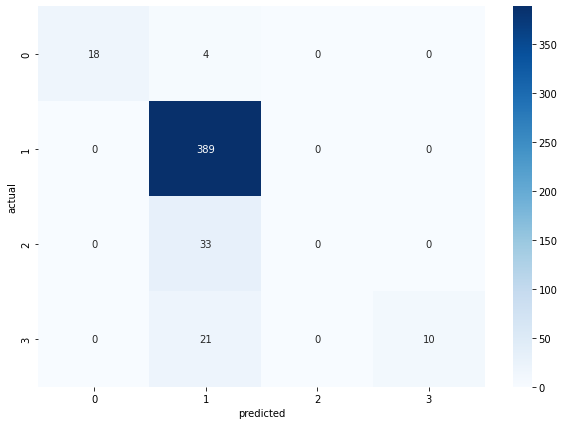

In [ ]:
plt.figure(figsize = (10,7))

sns.heatmap(confusion, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("     Classification report of Naive bayes model\n")
print(classification_report(y_test,y_pred))

     Classification report of Naive bayes model

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.87      1.00      0.93       389
           2       0.00      0.00      0.00        33
           3       1.00      0.32      0.49        31

    accuracy                           0.88       475
   macro avg       0.72      0.54      0.58       475
weighted avg       0.82      0.88      0.84       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Random Forest model evaluation
y_pred2=clf.predict(x_test)

In [ ]:

confusion2=confusion_matrix(y_test,y_pred2)

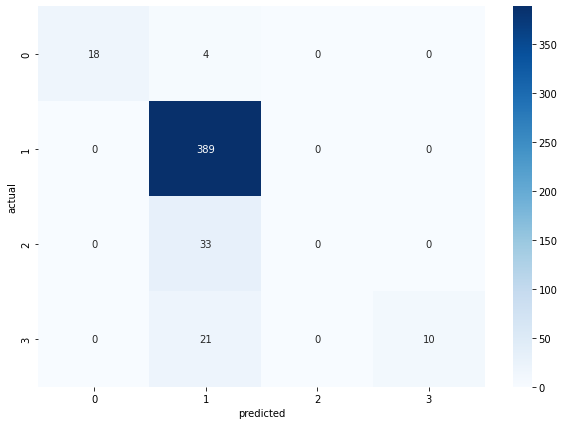

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion2, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("     Classification report of Random Forest\n")
print(classification_report(y_test,y_pred2))

     Classification report of Random Forest

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.87      1.00      0.93       389
           2       0.00      0.00      0.00        33
           3       1.00      0.32      0.49        31

    accuracy                           0.88       475
   macro avg       0.72      0.54      0.58       475
weighted avg       0.82      0.88      0.84       475



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


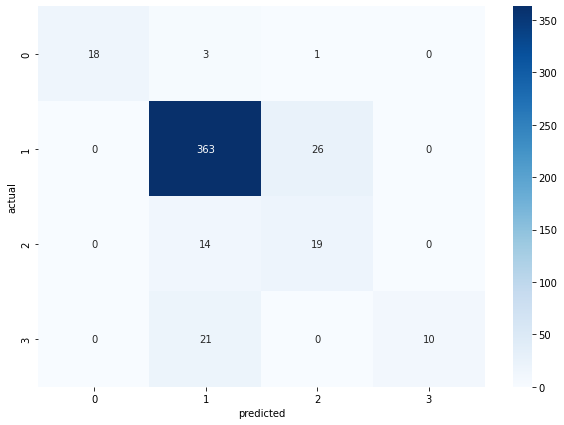

In [ ]:
# knnmodel evaluation
y_pred3=knn_clf.predict(x_test)
confusion3=confusion_matrix(y_test,y_pred3)
plt.figure(figsize = (10,7))
sns.heatmap(confusion3, annot=True,fmt='g',cmap='Blues')
plt.ylabel("actual")
plt.xlabel('predicted');

In [ ]:
print("Classification report of knn\n")
print(classification_report(y_test,y_pred3))

Classification report of knn

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.91      0.93      0.92       389
           2       0.41      0.58      0.48        33
           3       1.00      0.32      0.49        31

    accuracy                           0.86       475
   macro avg       0.83      0.66      0.70       475
weighted avg       0.88      0.86      0.86       475



In [ ]:
from sklearn.svm import SVR
model=SVR()
model.fit(x_train,y_train)
pred=model.predict(x_test)
model.score(x_test,y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.33524745887642127

In [ ]:
from sklearn.linear_model import LogisticRegression
ypred_lr = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg')
ypred_lr.fit(x_train, y_train)
model1.predict(x_test)


NameError: ignored